# task1

主要参考：https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models

## 尝试对未增加tabel7天气信息的特征表格进行学习

In [11]:
# coding:utf-8
import pandas as pd
import numpy as np
# train = pd.read_csv('E:\Competetion\KDD-cup-2017\\data_pre\\table3456_train_task1.csv').set_index(['intersection_id','tollgate_id','time_window'])
# test = pd.read_csv('E:\Competetion\KDD-cup-2017\\data_pre\\table3456_test_task1.csv').set_index(['intersection_id','tollgate_id','time_window'])
train = pd.read_csv('E:\Competetion\KDD-cup-2017\\data_pre\\trainset_task1_total.csv').set_index(['intersection_id','tollgate_id','time_window'])
test = pd.read_csv('E:\Competetion\KDD-cup-2017\\data_pre\\testset_task1_total.csv').set_index(['intersection_id','tollgate_id','time_window'])

In [12]:
print train.shape, test.shape

(25648, 55) (504, 57)


In [13]:
X_train = train.drop('avg_travel_time',axis=1).values
X_test = test.drop('avg_travel_time',axis=1).values
y = train.avg_travel_time.values

In [14]:
del test,train

In [15]:
# 尝试基本的线性回归及正则化线性回归模型
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn.metrics.scorer import make_scorer
from sklearn.utils import check_array
# 定义评分函数
def MAPE(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))
score = make_scorer(MAPE, greater_is_better=False)

LR = LinearRegression()
# Sklearn 计算模型的负均方误差，所以我们需要先取负再开根号得到我们的参数均方根误差
# cv = 5 会将数据分成大小相似的10份，轮流用9份用来训练，１份用来评估计算得分，会得到10个得分
test_score = cross_val_score(LR, X_train, y, cv=10, scoring=score)
print(test_score)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

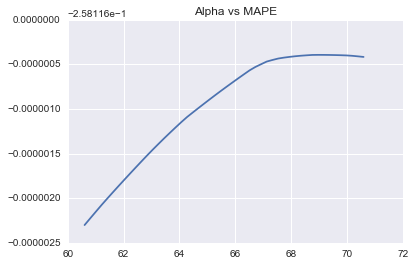

In [6]:
# ridge回归
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
alphas = np.linspace(60.6, 70.6, 50)
test_scores = []
results = []
for alpha in alphas:
    clf = Ridge(alpha)
    test_score = cross_val_score(clf, X_train, y, cv=10, scoring=score)
    test_scores.append(np.mean(test_score))
    results.append([alpha, np.mean(test_score)])
plt.plot(alphas, test_scores)
plt.title("Alpha vs MAPE");

In [7]:
results = sorted(results, key=lambda x:-x[1])
results[0]

[68.967346938775506, -0.25811639497296246]

#### 模型１：Ridge(68.96) 得分0.25811639497296246

In [ ]:
# Lasso
param_grid = {
 'alpha':np.linspace(0.018,0.02, 10)
}
grid_search = GridSearchCV(Lasso(),param_grid=param_grid,cv=5, verbose=2,n_jobs =4,
                          scoring=score,error_score=0,refit=True)
grid_search.fit(X_train, y)
print grid_search.best_params_
print grid_search.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [8]:
# Xgboost
import os
mingw_path = 'C:\Program Files\mingw-w64\\x86_64-6.3.0-posix-seh-rt_v5-rev1\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
import xgboost as xgb

regr = xgb.XGBRegressor(
                 colsample_bytree=0.2,
                 gamma=0.0,
                 learning_rate=0.02,
                 max_depth=7,
                 min_child_weight=1.5,
                 n_estimators=3000,                                                                  
                 reg_alpha=0.9,
                 reg_lambda=0.6,
                 subsample=0.2,
                 seed=42,
                 silent=1)

est_score = cross_val_score(regr, X_train, y, cv=10, scoring=score,verbose=2)
print(test_score)

[CV]  ................................................................
[CV] ................................................. , total=  55.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   55.5s remaining:    0.0s


[CV] ................................................. , total=  46.9s
[CV]  ................................................................
[CV] ................................................. , total=  39.4s
[CV]  ................................................................
[CV] ................................................. , total=  39.7s
[CV]  ................................................................
[CV] ................................................. , total=  39.2s
[CV]  ................................................................
[CV] ................................................. , total=  39.3s
[CV]  ................................................................
[CV] ................................................. , total=  39.6s
[CV]  ................................................................
[CV] ................................................. , total=  39.8s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  7.0min finished


In [9]:
print(np.mean(est_score))

-0.266530227018


## 输出结果

In [11]:
# 训练，预测
regr.fit(X_train, y)
test = pd.read_csv('E:\Competetion\KDDCUP2017_others\KDD-CUP-2017_0\dataSets\\table3456_test_task1.csv').set_index(['intersection_id','tollgate_id','time_window'])
test['avg_travel_time'] = regr.predict(X_test)
test = test.reset_index()
test = test[['intersection_id','tollgate_id','time_window','avg_travel_time']]
test.head()

,intersection_id,tollgate_id,time_window,avg_travel_time
0,A,2,"[2016-10-18 08:00:00,2016-10-18 08:20:00)",76.080978
1,A,3,"[2016-10-18 08:00:00,2016-10-18 08:20:00)",136.453705
2,B,1,"[2016-10-18 08:00:00,2016-10-18 08:20:00)",120.914413
3,B,3,"[2016-10-18 08:00:00,2016-10-18 08:20:00)",112.000175
4,C,1,"[2016-10-18 08:00:00,2016-10-18 08:20:00)",162.149231


In [12]:
test.to_csv('E:\Competetion\KDD-cup-2017\\result\\xgboost_ver1.csv', index=False)

In [13]:
test.shape

(504, 4)